In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Users\apujals\PycharmProjects\NEC\utils


### Prepare the dataset A1-turbine

In [3]:
# Import txt file
df1 = pd.read_csv('A1-turbine.csv', decimal=".")

#Print the data type of each column, and the range of values
print(df1.info())

df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   height    451 non-null    float64
 1   fall      451 non-null    float64
 2   net_fall  451 non-null    float64
 3   flow      451 non-null    float64
 4   power     451 non-null    float64
dtypes: float64(5)
memory usage: 17.7 KB
None


,height,fall,net_fall,flow,power
count,451.000000,451.000000,451.000000,451.000000,451.000000
mean,611.873614,77.147605,76.487583,5.921286,3868.492262
std,11.088312,10.745153,11.070332,1.782916,1399.998523
min,591.000000,56.790000,55.140000,3.000000,1675.160000
25%,603.000000,68.865000,67.477500,4.500000,2710.670000
50%,612.000000,76.840000,76.415000,6.000000,3689.140000
75%,622.000000,86.665000,86.177500,7.500000,4901.160000
max,630.000000,96.210000,95.935000,9.000000,7261.370000


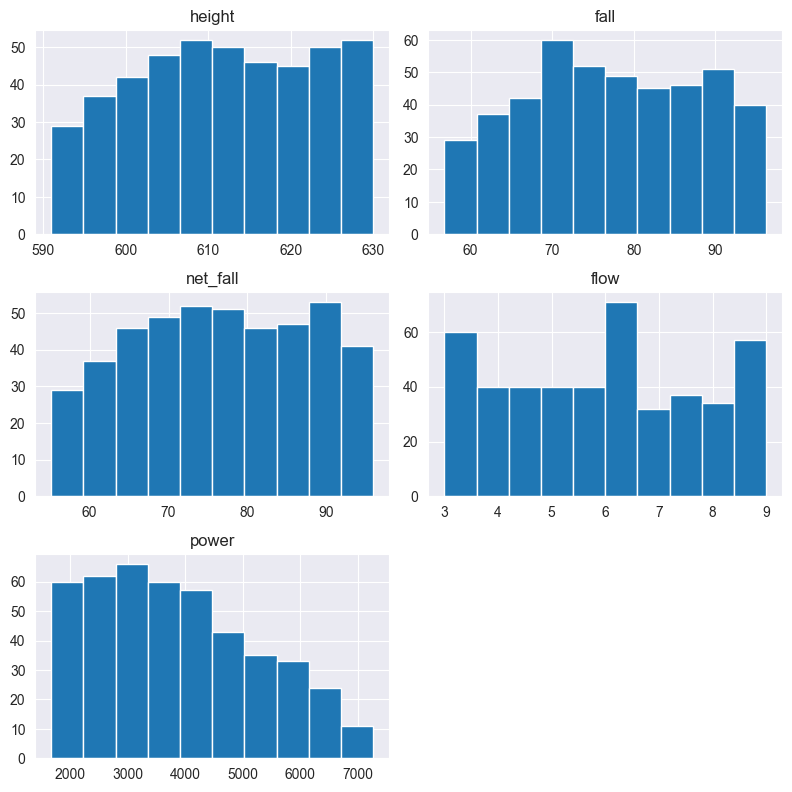

In [4]:
# Plot the distribution of the data for all the columns
df1.hist(figsize=(8, 8))  # You can adjust the figsize to your preference
plt.tight_layout(pad=1.0)   # Add more space between the figures
plt.show()

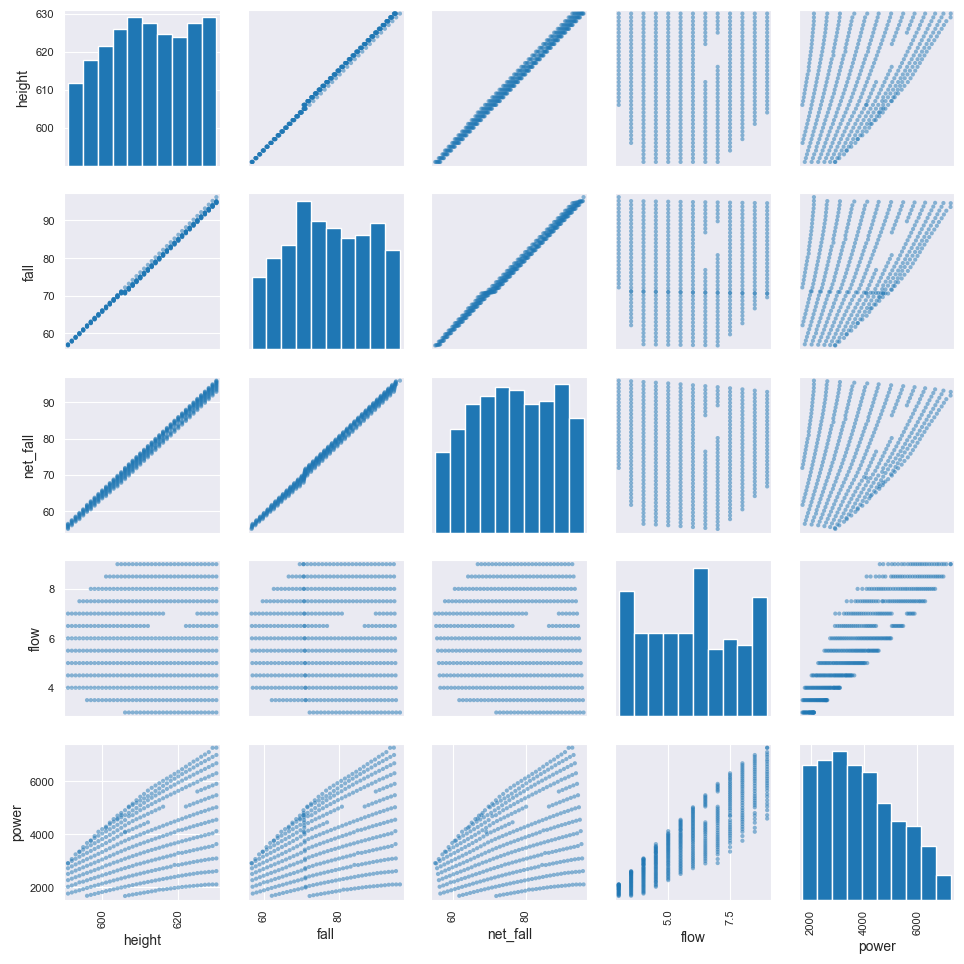

In [31]:
#Print a matrix of scatter plots for all the columns
pd.plotting.scatter_matrix(df1, figsize=(10, 10))
plt.tight_layout(pad=2.0)   # Add more space between the figures
plt.show()

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Scale the features and target variable to the range [0, 1]
scaler = MinMaxScaler()
df1_scaled = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)


### Prepare the dataset A1-synthetic

In [33]:
# Import txt file
df2 = pd.read_csv('A1-synthetic.csv', decimal=".")

#Print the data type of each column, and the range of values
print(df2.info())

df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v1      1000 non-null   float64
 1   v2      1000 non-null   float64
 2   v3      1000 non-null   float64
 3   v4      1000 non-null   float64
 4   v5      1000 non-null   float64
 5   v6      1000 non-null   float64
 6   v7      1000 non-null   float64
 7   v8      1000 non-null   int64  
 8   v9      1000 non-null   float64
 9   z       1000 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 78.3 KB
None


,v1,v2,v3,v4,v5,v6,v7,v8,v9,z
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.968392,11.005370,0.511468,2.417192,100.108795,2.726705,78.148504,0.313000,13.868300,6.367773
std,28.418028,0.584090,0.283292,1.147284,4.893623,0.275193,5.016537,0.463946,3.253272,3.841009
min,-49.942910,10.000103,0.000147,1.002395,85.147019,1.974029,62.554174,0.000000,10.100000,-0.791114
25%,-23.938244,10.510135,0.267591,1.258367,96.934414,2.540117,74.814175,0.000000,10.861926,3.124304
50%,2.852507,10.990934,0.515436,3.042135,99.920497,2.710712,78.101481,0.000000,13.089869,5.665139
75%,25.494062,11.517569,0.757415,3.498211,103.482385,2.902578,81.604561,1.000000,16.366096,9.260205
max,49.889593,11.999189,0.999727,3.999776,116.239538,3.600914,94.502170,1.000000,22.033951,16.080230


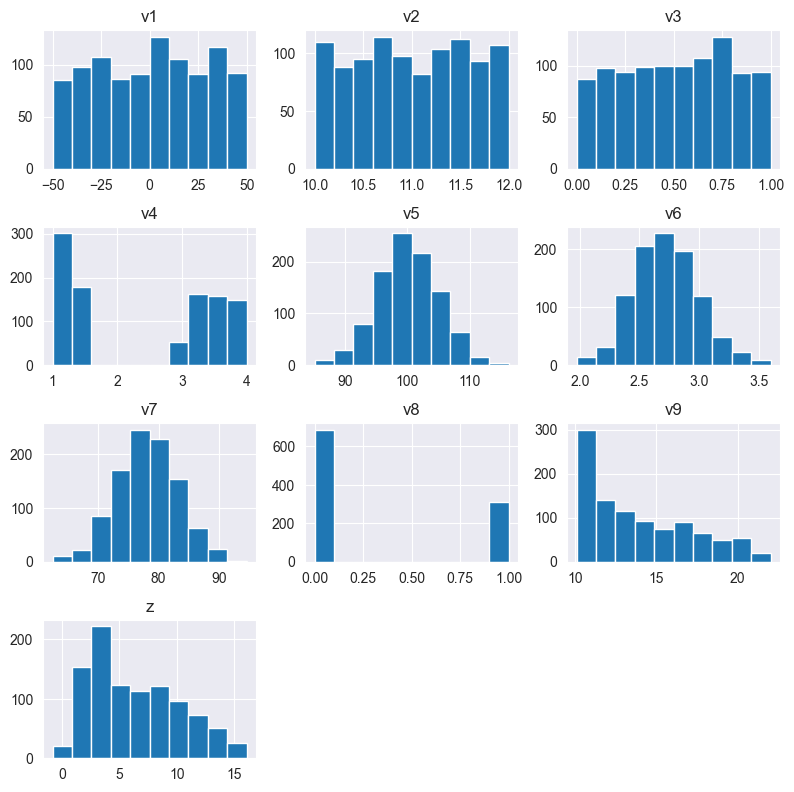

In [34]:
# Plot the distribution of the data for all the columns
df2.hist(figsize=(8, 8))  # You can adjust the figsize to your preference
plt.tight_layout(pad=1.0)   # Add more space between the figures
plt.show()

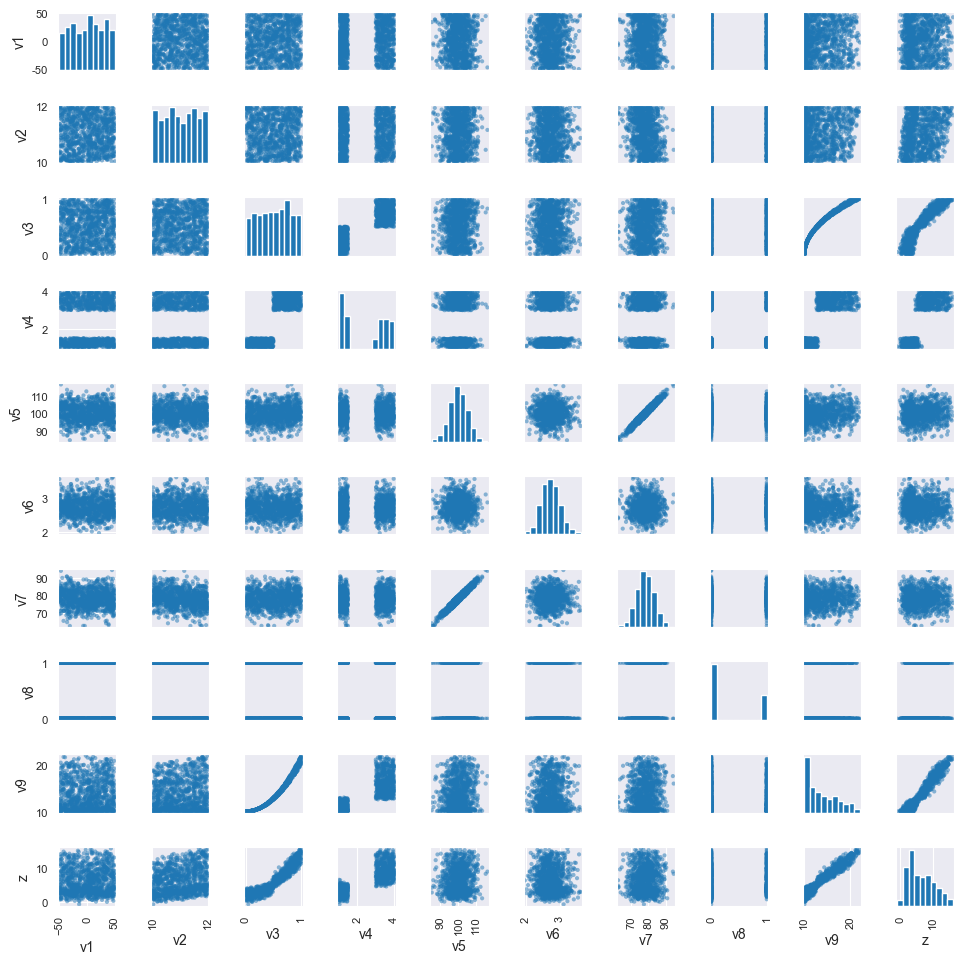

In [35]:
#Print a matrix of scatter plots for all the columns
pd.plotting.scatter_matrix(df2, figsize=(10, 10))
plt.tight_layout(pad=2.0)   # Add more space between the figures
plt.show()

In [36]:
# Scale the features and target variable to the range [0, 1]
scaler = MinMaxScaler()
df2_scaled = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)


### Separate the data into input / output features and generate the train/test split

In [44]:
from sklearn.model_selection import train_test_split

#separate the data into features and target


#x, y = df1.drop(["power"], axis=1), df1[["power"]]
x, y = df1_scaled.drop(["power"], axis=1), df1_scaled[["power"]]
#x, y = df2.drop(["z"], axis=1), df2[["z"]]
#x, y = df2_scaled.drop(["z"], axis=1), df2_scaled[["z"]]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [38]:
#print the training and testing sets shape
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(383, 4) (383, 1)
(68, 4) (68, 1)


### Fit a linear regression model and evaluate the predictions

In [45]:
# Create a model that is a Linear Regression

from sklearn.linear_model import LinearRegression

mlr_model = LinearRegression()

# fit the model with the data
mlr_model.fit(x_train, y_train)

#print the parameters of the model
print(f"Model parameters:\nCoefficients: {mlr_model.coef_}\nIntercept: {mlr_model.intercept_}")



Model parameters:
Coefficients: [[-5.85052442 -0.95578957  7.4938473   1.27172361]]
Intercept: [-0.52251382]


In [46]:
#Evaluation of the model with the training data

#print the score of the model (the R^2 value)
print("Model score: ", mlr_model.score(x_train, y_train))

y_pred = mlr_model.predict(x_train)

# THESE VALUES ARE DEPENDENT ON USING SCALED DATA OR NOT

#print the mean squared error of the model
from sklearn.metrics import mean_squared_error
print("Mean squared error (MSE): ", mean_squared_error(y_train, y_pred))

#print the root mean squared error of the model
from sklearn.metrics import mean_squared_error
print("Root mean squared error (RMSE): ", np.sqrt(mean_squared_error(y_train, y_pred)))

#print the mean absolute error of the model
from sklearn.metrics import mean_absolute_error
print("Mean absolute error (MAE): ", mean_absolute_error(y_train, y_pred))

#print the mean absolute percentage error of the model
from sklearn.metrics import mean_absolute_percentage_error
print("Mean absolute percentage error (MAPE): ", mean_absolute_percentage_error(y_train, y_pred))



Model score:  0.9730596014720563
Mean squared error (MSE):  0.0017010608325370943
Root mean squared error (RMSE):  0.04124391873400361
Mean absolute error (MAE):  0.03212072919238356
Mean absolute percentage error (MAPE):  722364257792.0228


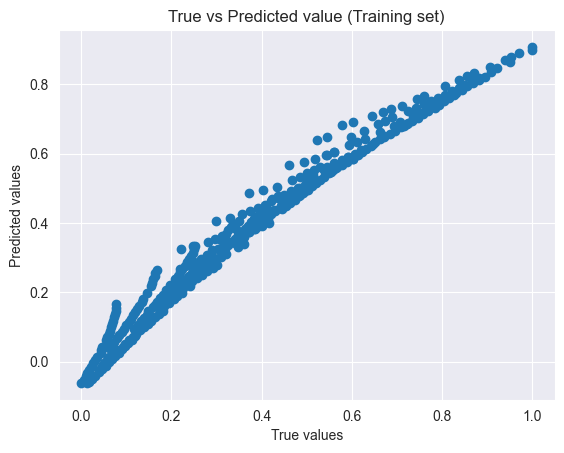

In [47]:
#plot the model predictions and the data
import matplotlib.pyplot as plt

plt.scatter(y_train, mlr_model.predict(x_train))
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True vs Predicted value (Training set)")
plt.show()


In [51]:
#Evaluation of the model with the test data
 
 #print the score of the model (the R^2 value)
print("Model score: ", mlr_model.score(x_test, y_test))

y_pred = mlr_model.predict(x_test)

# THESE VALUES ARE DEPENDENT ON USING SCALED DATA OR NOT

#print the mean squared error of the model
from sklearn.metrics import mean_squared_error
print("Mean squared error (MSE): ", mean_squared_error(y_test, y_pred))

#print the root mean squared error of the model
from sklearn.metrics import mean_squared_error
print("Root mean squared error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))

#print the mean absolute error of the model
from sklearn.metrics import mean_absolute_error
print("Mean absolute error (MAE): ", mean_absolute_error(y_test, y_pred))

#print the mean absolute percentage error of the model
from sklearn.metrics import mean_absolute_percentage_error
print("Mean absolute percentage error (MAPE): ", mean_absolute_percentage_error(y_test, y_pred))


Model score:  0.9694215238330672
Mean squared error (MSE):  0.0017233444177259664
Root mean squared error (RMSE):  0.041513183661650986
Mean absolute error (MAE):  0.02702136962132262
Mean absolute percentage error (MAPE):  1.03085493749078


Model score:  0.969421523833067


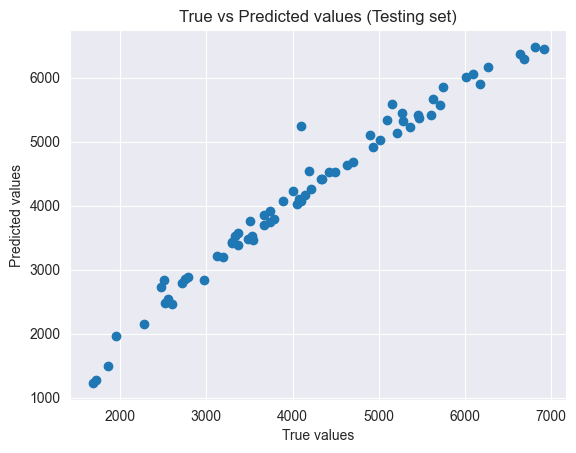

In [43]:
#Repeat the same steps for the testing set

print("Model score: ", mlr_model.score(x_test, y_test))

plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True vs Predicted values (Testing set)")
plt.show()
